In [ ]:
# 在运行其他代码前，请先运行此块代码！

%load_ext jupyter_spaces
%load_ext blackcellmagic

[◀ 上一节](3.1.ipynb)

[回到目录](https://lechocolatchaud.github.io/ITClass/)

<br/>

*普通高中教科书 信息技术*

*必修一 数据与计算*

# 第三章 数据处理与应用 - 第二节

本节主要讲解数据分析与可视化。

## 数据分析

### 数据分析基本方法

1. 对比分析法
2. 平均分析法
3. 结构分析法


### 数据分析常用工具

1. 电子表格软件
2. 在线数据分析平台
3. 数据分析语言

### 实例

**目标**：统计共享单车某个站点全天的开锁量，并计算其单位小时内最大的开锁量

#### 1. 分析数据

In [ ]:
%%space data_analysis_demo

import pandas as pd
import numpy as np

bike_df = pd.read_csv("csv/bike.csv", encoding="utf-8")

print(bike_df)

#### 2. 确定方法

要统计全天的开锁量，先要利用`value_counts()`函数进行频数统计，得到单位小时内的开锁量，然后再利用`sum()`函数和`max()`函数分别求得总开锁量和单位小时内的最大开锁量。

#### 3. 编程与调试

In [ ]:
%%space data_analysis_demo

count = bike_df[(bike_df["date"] == "6月21日") & (bike_df["local_name"] == "Library")]   # 选出日期是6月21日且地点是"Library"的数据集
thiscount = count["hour"].value_counts()         # 按照时间进行频数统计
print(thiscount)
print(np.max(thiscount))            # 查看6月21日一天中共享单车单位小时内的最大开锁量
print(np.sum(thiscount))            # 查看6月21日一天中共享单车的开锁总量

## 数据可视化

### 数据可视化的基本工具

Python 语言中，Matplotlib 中 pyplot 子库所提供的函数可以制作高质量的数据分析图。

引入 Matplotlib 的 pyplot 子库的语法为：

```python
import matplotlib.pyplot as plt
```

#### pyplot 绘制图形的基本流程

1. 创建画布与创建子图
*（可选择将画布划分为多个部分）*
1. 添加画布内容
1. 保存与显示图形

#### 绘制图形相关函数

> [Matplotlib 官方文档](https://matplotlib.org/stable/api/)

##### 创建画布以及创建并选中子图的函数

|函数名称|函数作用|
|-|-|
|`plt.figure()`|创建一张空白画布，可以指定画布大小、像素|
|`figure.add_subplot()`|创建并选中子图，可以指定子图的行数、列数和选中图片的编号|

##### 添加各类标签和图例的函数

*注：先绘制图形和添加各类标签，再添加图例*

|函数名称|函数作用|
|-|-|
|`plt.title()`|在当前图形中添加标题，可以指定标题的名称、位置、颜色、字体大小等参数|
|`plt.xlabel()`|在当前图形中添加x轴名称，可以指定位置、颜色、字体大小等参数|
|`plt.ylabel()`|在当前图形中添加y轴名称，可以指定位置、颜色、字体大小等参数|
|`plt.xlim()`|指定当前图形x轴的范围，只能确定一个数值区间，而无法使用字符串标识|
|`plt.ylim()`|指定当前图形y轴的范围，只能确定一个数值区间，而无法使用字符串标识|
|`plt.xticks()`|指定x轴刻度的数目与取值|
|`plt.yticks()`|指定y轴刻度的数目与取值|
|`plt.legend()`|显示当前图形的图例，可以指定图例的大小、位置、标签|

##### 保存和显示图形的常用函数

|函数名称|函数作用|
|-|-|
|`plt.savefig()`|保存绘制的图形，可以指定图形的分辨率、边缘的颜色等参数|
|`plt.show()`|在本机显示图形|

例如，已知两条曲线 $y=x^2$ 和 $y=x^4$ ，当 $x\in [0,1.1)$ 时，绘制一个最简单的不含子图的图形，具体代码如下：

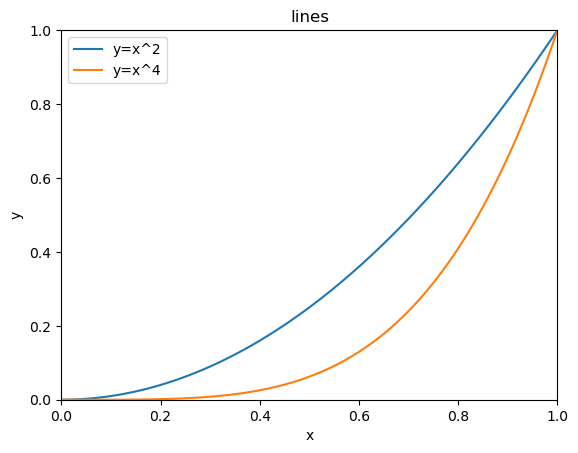

In [17]:
import numpy as np
import matplotlib.pyplot as plt

data = np.arange(0, 1.1, 0.01)

plt.title("lines")

plt.xlabel("x")
plt.ylabel("y")

plt.xlim((0,1))
plt.ylim((0,1))

plt.xticks([0,0.2,0.4,0.6,0.8,1])
plt.yticks([0,0.2,0.4,0.6,0.8,1])

plt.plot(data, data**2)
plt.plot(data, data**4)

plt.legend(["y=x^2", "y=x^4"])

plt.show()

### 常用的数据分析图

*按目的分类*

#### 分析特征间的关系

- 散点图
    - 以一个特征为横坐标，以另一个特征为纵坐标
    - 利用坐标点（散点）的分布形态反映特征间统计关系
    - 提供的两类关键信息：
        - 特征之间是否存在数值或者数量的线性或非线性关联趋势
        - 能比较直观地发现离群值

pyplot 中绘制散点图的函数为 `scatter()` ，其语法如下：

```python
matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, alpha=None)
```

|参数名称|说明|
|-|-|
|`x,y`|接收数组，表示x轴和y轴对应的数据，无默认值|
|`s`|接收标量或一维数组，指定点的大小。若传入一维数组，则列表中的元素对应表示每个点的大小。默认为 `None`|
|`c`|接收颜色或一维数组，指定点的颜色。若传入一维数组，则列表中的元素对应表示每个点的颜色。默认为 `None`|
|`marker`|接收特定字符串，表示绘制的点的类型。默认为 `None`|
|`alpha`|接收 0~1 的小数，表示点的透明度。默认为 `None`|

例如，当 $x\in [0, 1.4)$ 时绘制曲线 $y=x^2$ 和 $y=x^4$ 的简单散点图，具体代码如下：

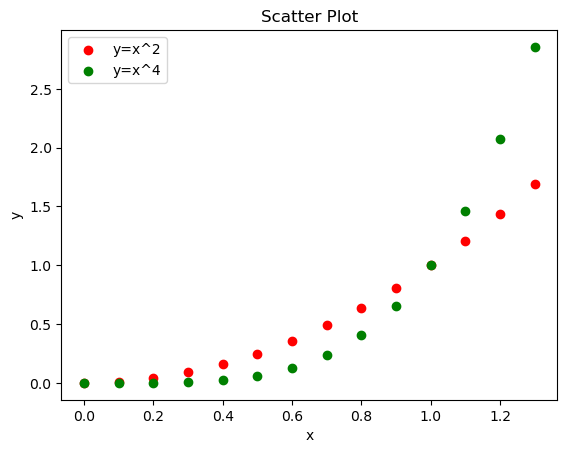

In [18]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 1.4, 0.1)

plt.title("Scatter Plot")

plt.xlabel("x")
plt.ylabel("y")

plt.scatter(x, x**2, c='r', marker='o')
plt.scatter(x, x**4, c='g', marker='o')

plt.legend(["y=x^2", "y=x^4"])

plt.show()

- 折线图
    - 将数据点按照顺序连接起来
    - 查看因变量y随着自变量x改变的趋势

pyplot 中绘制折线图的函数为 `plot()` ，其语法如下：

```python
matplotlib.pyplot.plot(x, y, color=None, linestyle="-", linewidth=0.5)
```

|参数名称|说明|
|-|-|
|`x,y`|接收数组，表示x轴和y轴对应的数据。无默认值|
|`color`|接收特定字符串，指定线条颜色。默认为 None|
|`linestyle`|接收特定字符串，指定线条类型。默认为`"-"`|
|`linewidth`|接收浮点数，指定线条宽度。默认为 0.5|

以共享单车数据为例，观察某区图书馆站点的共享单车在一天24小时中的使用情况，并绘制折线图，具体代码如下：